In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
!git clone https://github.com/vikram2727/Volve-ML.git

Cloning into 'Volve-ML'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [8]:
!pip install lasio
import lasio

In [56]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("/content/Volve-ML/well log/", "*.LAS")))

well_df = [0] * 3
for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()

well1, well2, well3 = well_df

In [57]:
well1.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NPHI,PEF,RACEHM,RACELM,RHOB,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
well1 = well1.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS','ROP',	'RPCEHM',	'RPCELM','DRHO','RACELM','RACEHM'], axis = 1) 

In [59]:
well1 = well1.reindex(columns=['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT'])

In [60]:
well1 = well1.loc[(well1['DEPTH'] >= 2620) & (well1['DEPTH'] <= 3640)]

In [61]:
well1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10201 entries, 24741 to 34941
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   10201 non-null  float64
 1   NPHI    10201 non-null  float64
 2   RHOB    10201 non-null  float64
 3   GR      10201 non-null  float64
 4   RT      10201 non-null  float64
 5   PEF     10201 non-null  float64
 6   CALI    10201 non-null  float64
 7   DT      10201 non-null  float64
dtypes: float64(8)
memory usage: 717.3 KB


In [62]:
well2.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NBGRCFM,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
well2 = well2.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS','ROP',	'RPCEHM',	'RPCELM','DRHO','RACELM','RACEHM'], axis = 1) 

In [65]:
well2 = well2.reindex(columns=['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT'])

In [71]:
well2 = well2.loc[(well2['DEPTH'] >= 3100) & (well2['DEPTH'] <= 3400)]

In [73]:
well2.head()

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT
29541,3100.0,0.0655,2.6299,19.6965,4.8173,8.2226,8.6637,67.5442
29542,3100.1,0.0669,2.6294,19.3109,4.7851,8.2248,8.6637,67.8434
29543,3100.2,0.0681,2.6295,18.9309,4.6833,8.1745,8.6637,68.1851
29544,3100.3,0.0690,2.6298,19.2300,4.5610,8.0927,8.6637,68.5067
29545,3100.4,0.0697,2.6300,19.3024,4.5761,8.0160,8.6637,68.7443


In [74]:
well3.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NBGRCFM,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
well3 = well3.drop(['ABDCQF01','ABDCQF02', 'ABDCQF03', 'ABDCQF04','BS','ROP',	'RPCEHM',	'RPCELM','DRHO','RACELM','RACEHM'], axis = 1) 

In [77]:
well3 = well3.reindex(columns=['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI'])

In [79]:
well3 = well3.loc[(well3['DEPTH'] >= 3100) & (well3['DEPTH'] <= 4050)]

In [81]:
well3.head()

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI
29541,3100.0,0.1378,2.5729,33.1264,3.0503,7.9837,8.5243
29542,3100.1,0.1368,2.5696,32.5644,3.0585,7.9401,8.5243
29543,3100.2,0.1351,2.5670,32.3169,3.0454,7.9126,8.5243
29544,3100.3,0.1341,2.5668,32.9734,3.0365,7.9216,8.5243
29545,3100.4,0.1349,2.5690,33.0557,3.0844,7.9582,8.5243


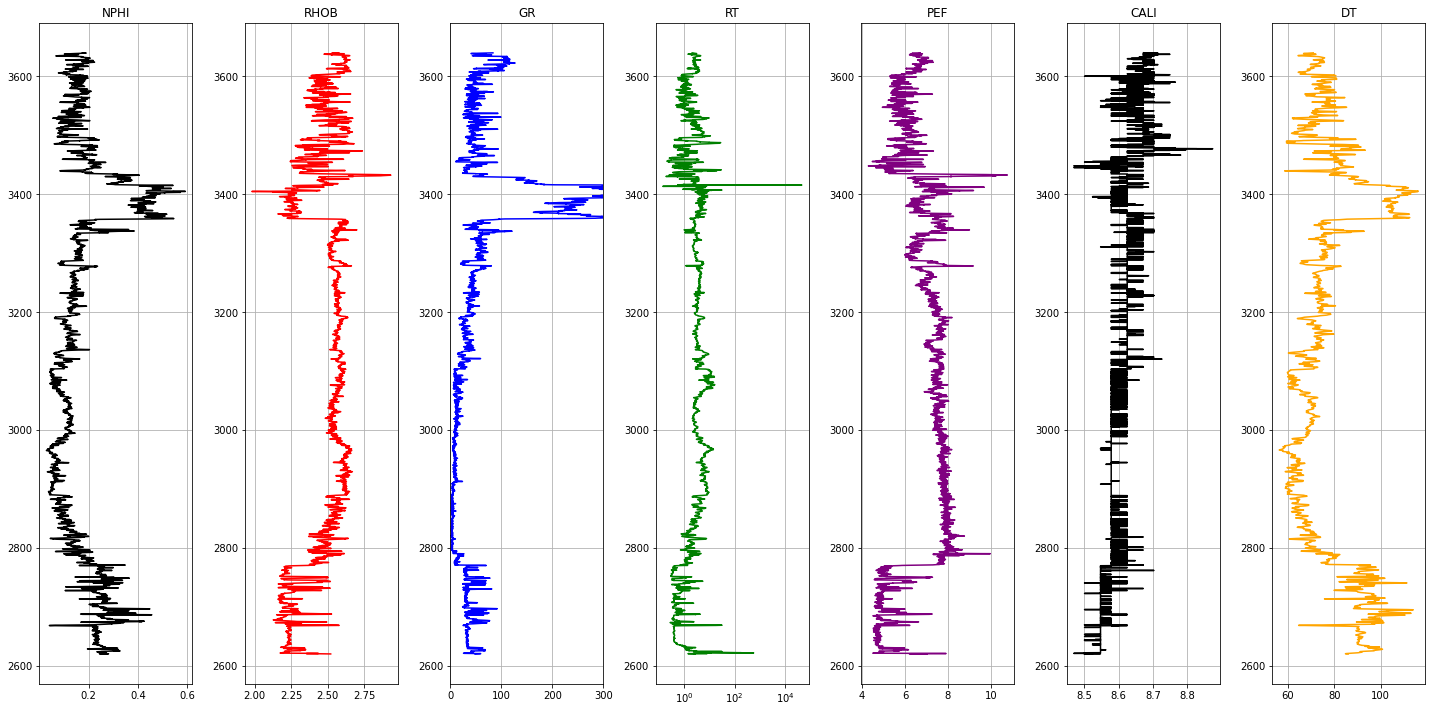

In [82]:
# Display train well data
well = well1 # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 300)
plt.tight_layout(1.1)
plt.show()

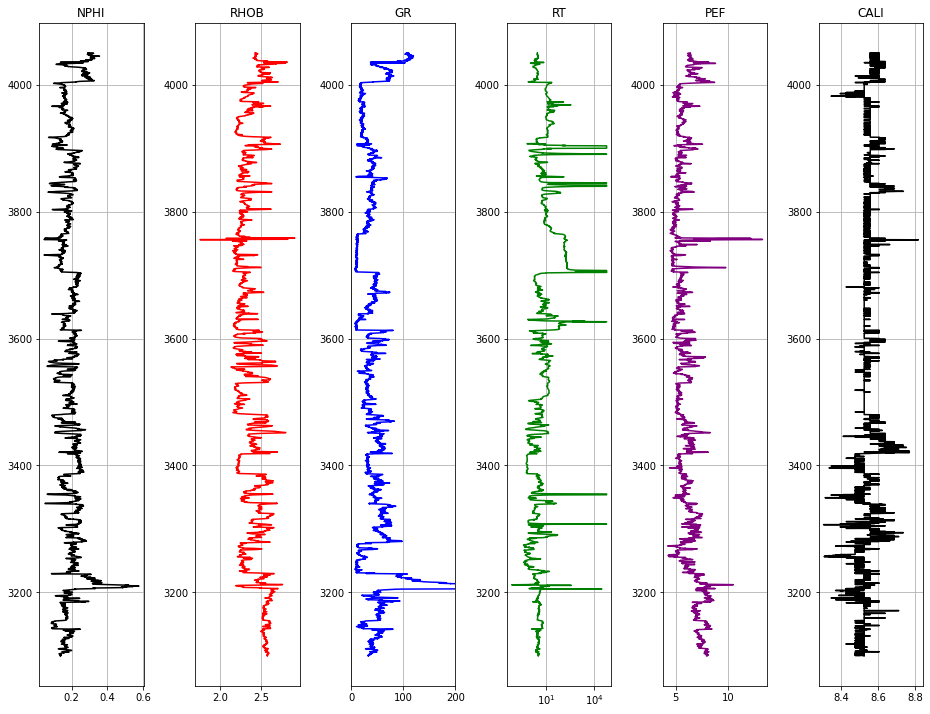

In [83]:
# Display the test data
well = well3 # test wells: well2, well5

# define what logs are we going to us
logs = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(13,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple', 'black']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 200)
plt.tight_layout(1)
plt.show()

In [84]:
colnames = well1.columns
only_feature = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI'] # only feature column names
only_target = 'DT' # only target column names
feature_target = np.append(only_feature, only_target) # feature and target column names

colnames

Index(['DEPTH', 'NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT'], dtype='object')

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# transform the RT to logarithmic
well1['RT'] = np.log10(well1['RT'])

# normalize using power transform Yeo-Johnson method
scaler = PowerTransformer(method='yeo-johnson')

## ColumnTransformer
column_drop = ['DEPTH']
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

## fit and transform
well_train_norm = ct.fit_transform(well1)

## convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT
0,1.048076,0.102006,0.539466,0.067758,0.078821,-2.701160,0.913613,2620.0
1,1.146105,-0.040160,0.601929,0.067349,-0.208307,-2.081903,0.882897,2620.1
2,1.256194,-0.278879,0.632809,-0.053261,-0.493992,-2.701160,0.866363,2620.2
3,1.280511,-0.541650,0.654990,-0.169793,-0.685459,-2.701160,0.849682,2620.3
4,1.206731,-0.791557,0.676778,-0.392112,-0.641659,-1.476511,0.841496,2620.4
...,...,...,...,...,...,...,...,...
10196,0.533501,0.224550,0.896221,-0.043912,-0.372535,1.772275,-0.466991,3639.6
10197,0.516690,0.303967,0.936724,-0.080270,-0.290615,1.441851,-0.420813,3639.7
10198,0.472905,0.423897,0.970052,-0.116223,-0.234845,1.441851,-0.375639,3639.8
10199,0.414755,0.548203,0.997008,-0.166768,-0.224972,1.441851,-0.331301,3639.9


In [86]:
x = well_train_norm[feature_target].astype(float)
y = well_train_norm['DEPTH'].astype(float)

well_train_norm = pd.concat([x, y], axis=1)

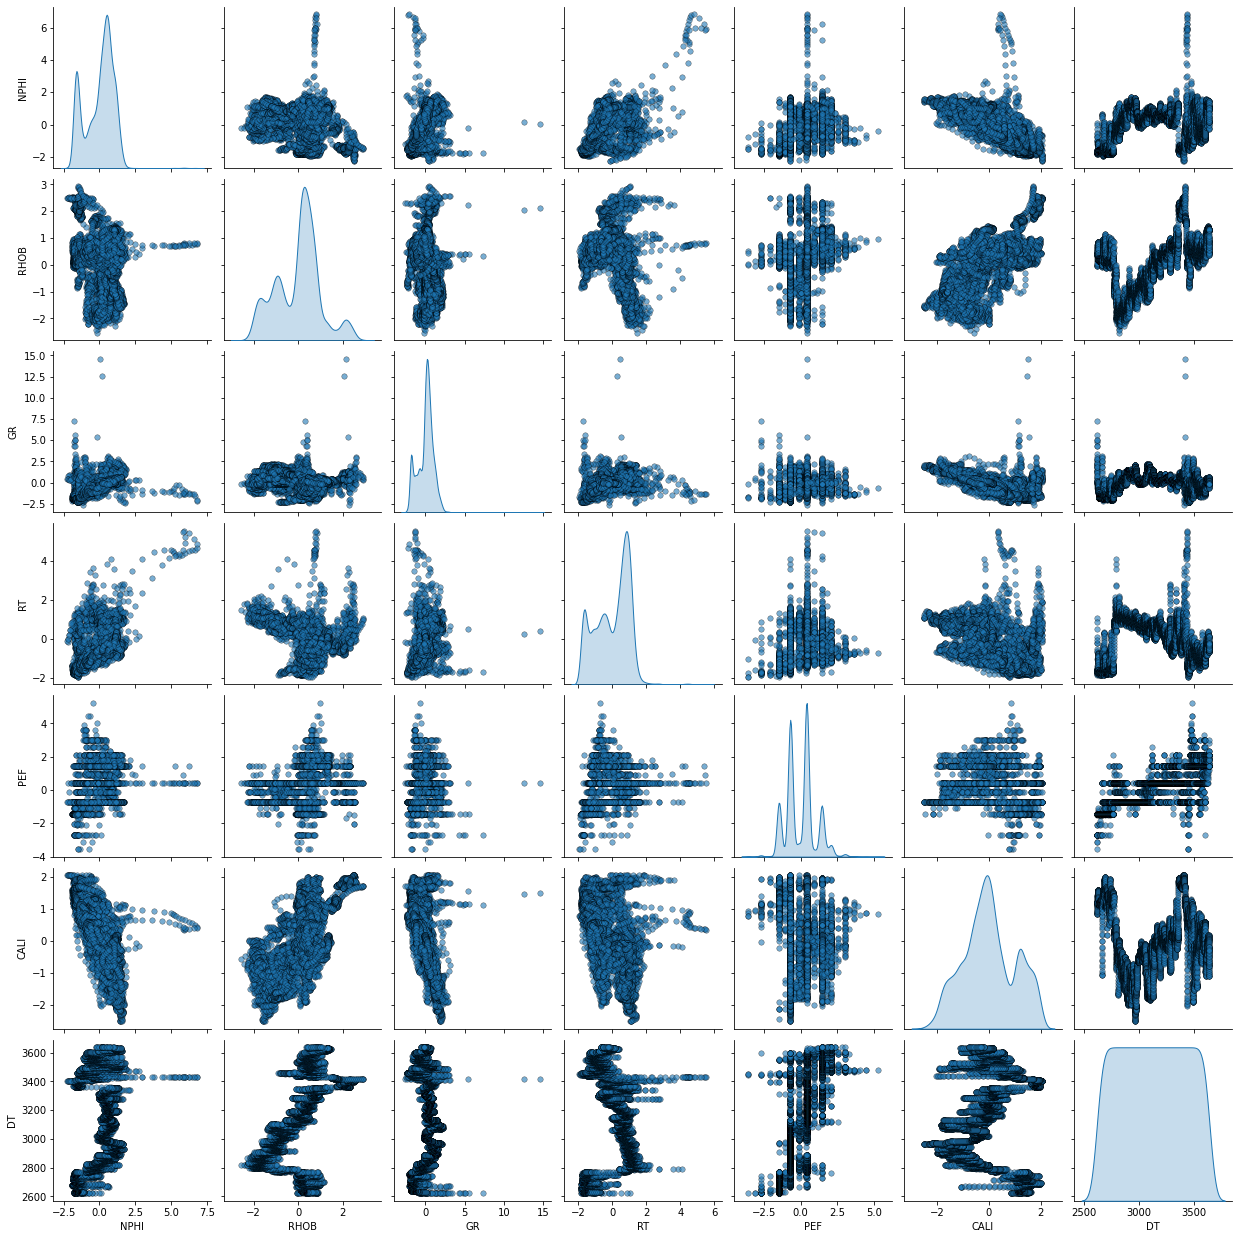

In [87]:
# x = well_train_norm[feature_target].astype(float)
sns.pairplot(well_train_norm, vars=feature_target, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [89]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['DEPTH'], axis=1)

In [90]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 10201
Number of points after outliers removed with Standard Deviation: 10073
Number of points after outliers removed with Isolation Forest  : 5101
Number of points after outliers removed with Min. Covariance   : 9181
Number of points after outliers removed with Outlier Factor    : 7141
Number of points after outliers removed with One-class SVM     : 9179


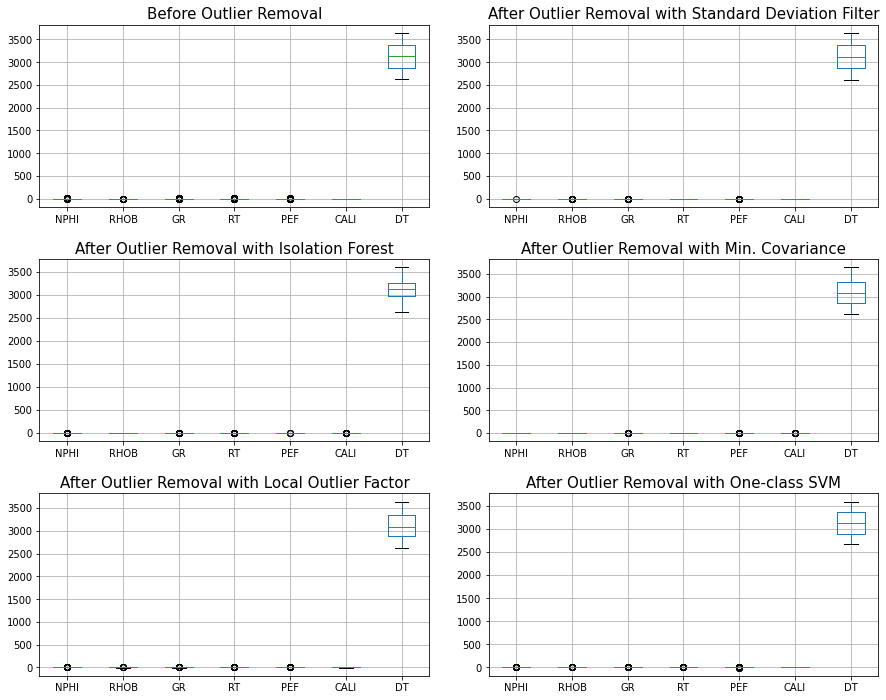

In [91]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

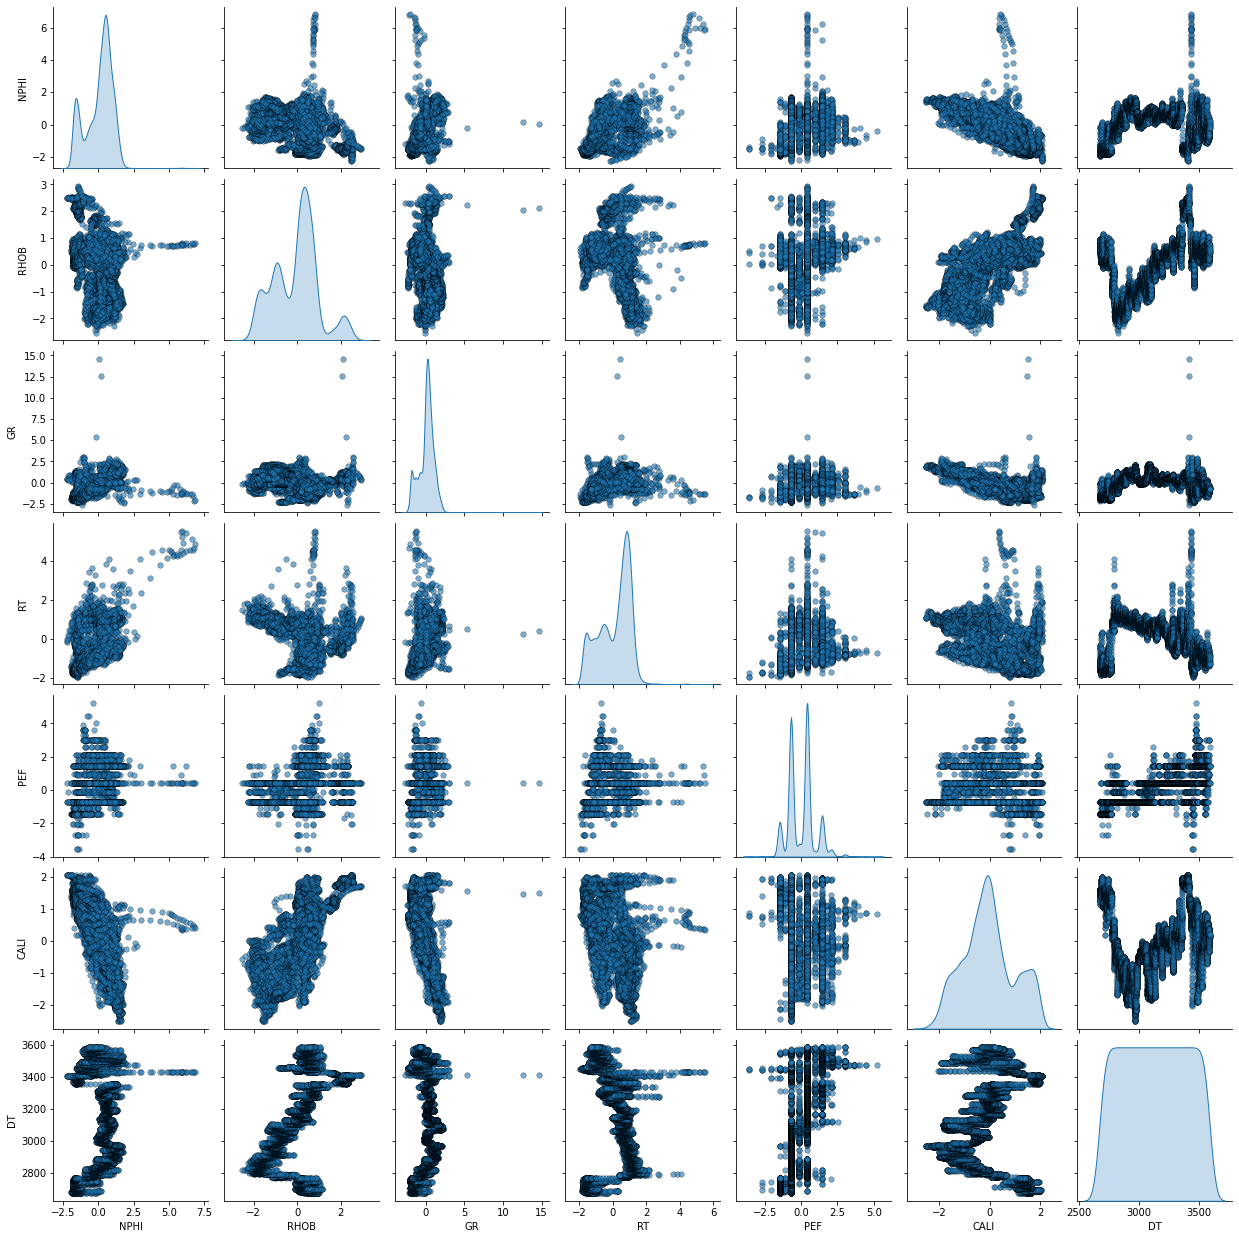

In [92]:
sns.pairplot(well_train_svm, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [110]:
# Define the train data
feature = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
target = 'DT'

X = well_train_svm[only_feature].values
y = well_train_svm[only_target].values

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
y_pred = regressor.predict(X_test)

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [   2.58943495  233.52736901  -49.82231851  -19.49985963  111.43388908
 -175.99396783]
Mean squared error: 20521.68
Coefficient of determination: 0.70


In [117]:
# make the transformer fit to the target
y = well1[target].values
scaler.fit(y.reshape(-1,1))


PowerTransformer(copy=True, method='yeo-johnson', standardize=True)

In [151]:
print(i)

1836


In [118]:
y_test, y_pred = scaler.inverse_transform(y_test.reshape(-1,1)), scaler.inverse_transform(y_pred.reshape(-1,1))

ValueError: ignored

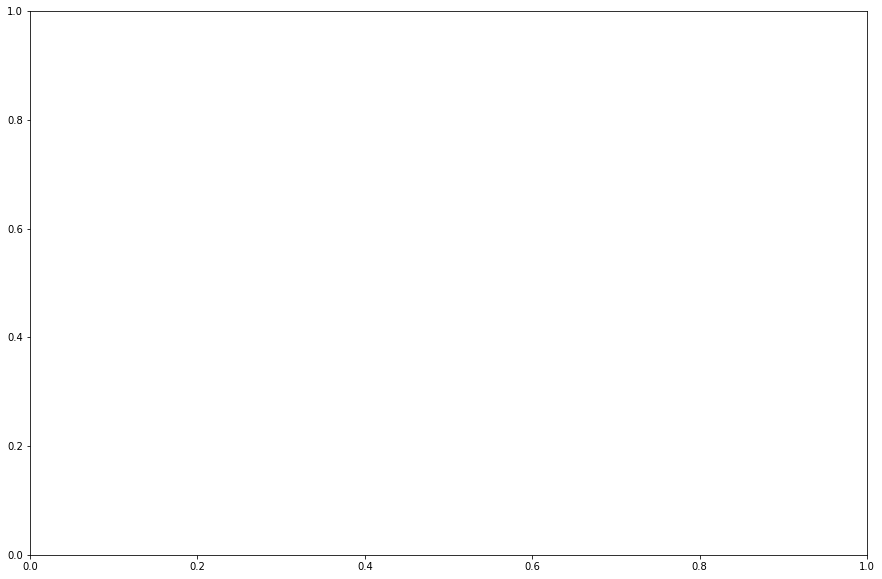

In [154]:
x = [y_test]
y = [y_pred]

color = ['purple', 'green']
title = ['True DT Well 1', 'Predicted DT Well 1']
        
fig, ax = plt.subplots(nrows=1, figsize=(15,10))


ax.plot(x, y, color=color)
ax.set_xlim(50, 150)
ax.set_ylim(np.max(y), np.min(y))
ax.set_title(title)

plt.tight_layout(1)

plt.show()

In [156]:
y_test

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [141]:
well1.shape

(10201, 8)

In [146]:
y

[24741    2620.0
 24742    2620.1
 24743    2620.2
 24744    2620.3
 24745    2620.4
           ...  
 34937    3639.6
 34938    3639.7
 34939    3639.8
 34940    3639.9
 34941    3640.0
 Name: DEPTH, Length: 10201, dtype: float64, 24741    2620.0
 24742    2620.1
 24743    2620.2
 24744    2620.3
 24745    2620.4
           ...  
 34937    3639.6
 34938    3639.7
 34939    3639.8
 34940    3639.9
 34941    3640.0
 Name: DEPTH, Length: 10201, dtype: float64]